Code to analyse the boundary search done in the HMS O2 computing cluster.

In [1]:
import sys,os
sys.path.append("../bin")
from import_paths import path_to_eigen, path_to_utilsGRF, path_to_utilsGRF_
sys.path.append(path_to_utilsGRF_)
import AnalyseBoundarysearch
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import BoundaryFinder as BF
import alphashape
import time

In [2]:
datafolder='../clustersearch/'
subfolder="2022_04_05_N4univ_allregion"
folder1=os.path.join(datafolder,subfolder)
ashapesfolder="./ashapes"
jid="51058388"
njobs=16
basename="N4univ"

name_ashape="ashape_%s_biggergrid"%basename
extremespars=[[1e-3,1e3]] #copy-paste from the boundary search
absder="True"


In [3]:
#check convergence
for i in range(1,njobs+1):
    fout=os.path.join(folder1,"%s_%d.out"%(jid,i))
    #print("##########",fout)
    lines=open(fout,"r").readlines()
    if len(lines)>1:
        line=lines[1]
        splitted=line.strip().split(",")
        #print(line)
        new=[]
        for k in range(1,len(splitted)-1,2):
            iter_=splitted[k]
            #print(iter_, iter_.split(" "))
            niter,nnew=[float(x.strip(".")) for x in iter_.split(" ")]
            new.append(nnew)
        #plt.figure(figsize=(4,3))
        #plt.scatter(range(len(new)),new)
        #plt.show()
        if len(new)<1500:
            print(i,"!!!not long enough", len(new), np.sum(new[-100:]),np.sum(new[-500:]))
        else:
            if np.sum(new[-1500:])==0:
                print(i,"ok",end=",")
            else:
                print(i,np.sum(new[-1500:]))
    else:
        print(i,"!!!not enough lines")

1 ok,2 ok,3 ok,4 ok,5 ok,6 ok,7 ok,8 ok,9 ok,10 ok,11 ok,12 ok,13 ok,14 ok,15 ok,16 ok,

folder to check ../clustersearch/2022_04_05_N4univ_allregion/tocheck_N4univ
folders are
['../clustersearch/2022_04_05_N4univ_allregion/final_results/mat_N4univ_5', '../clustersearch/2022_04_05_N4univ_allregion/final_results/mat_N4univ_4', '../clustersearch/2022_04_05_N4univ_allregion/final_results/mat_N4univ_11', '../clustersearch/2022_04_05_N4univ_allregion/final_results/mat_N4univ_10', '../clustersearch/2022_04_05_N4univ_allregion/final_results/mat_N4univ_2', '../clustersearch/2022_04_05_N4univ_allregion/final_results/mat_N4univ_3', '../clustersearch/2022_04_05_N4univ_allregion/final_results/mat_N4univ_8', '../clustersearch/2022_04_05_N4univ_allregion/final_results/mat_N4univ_9', '../clustersearch/2022_04_05_N4univ_allregion/final_results/mat_N4univ_15', '../clustersearch/2022_04_05_N4univ_allregion/final_results/mat_N4univ_14', '../clustersearch/2022_04_05_N4univ_allregion/final_results/mat_N4univ_6', '../clustersearch/2022_04_05_N4univ_allregion/final_results/mat_N4univ_7', '../clu

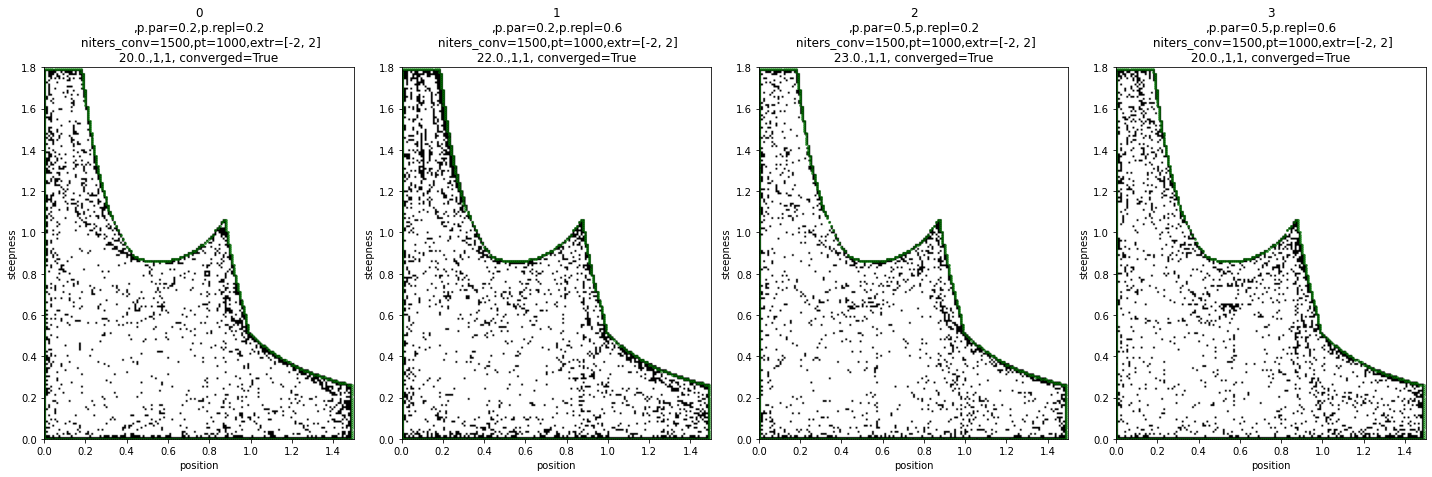

writing file to check in mat_N4univ_4.in
jid is 5
../clustersearch/2022_04_05_N4univ_allregion/final_results/mat_N4univ_5_last.npy
writing file to check in mat_N4univ_5.in
jid is 6
../clustersearch/2022_04_05_N4univ_allregion/final_results/mat_N4univ_6_last.npy
writing file to check in mat_N4univ_6.in
jid is 7
../clustersearch/2022_04_05_N4univ_allregion/final_results/mat_N4univ_7_last.npy
writing file to check in mat_N4univ_7.in
jid is 8
../clustersearch/2022_04_05_N4univ_allregion/final_results/mat_N4univ_8_last.npy


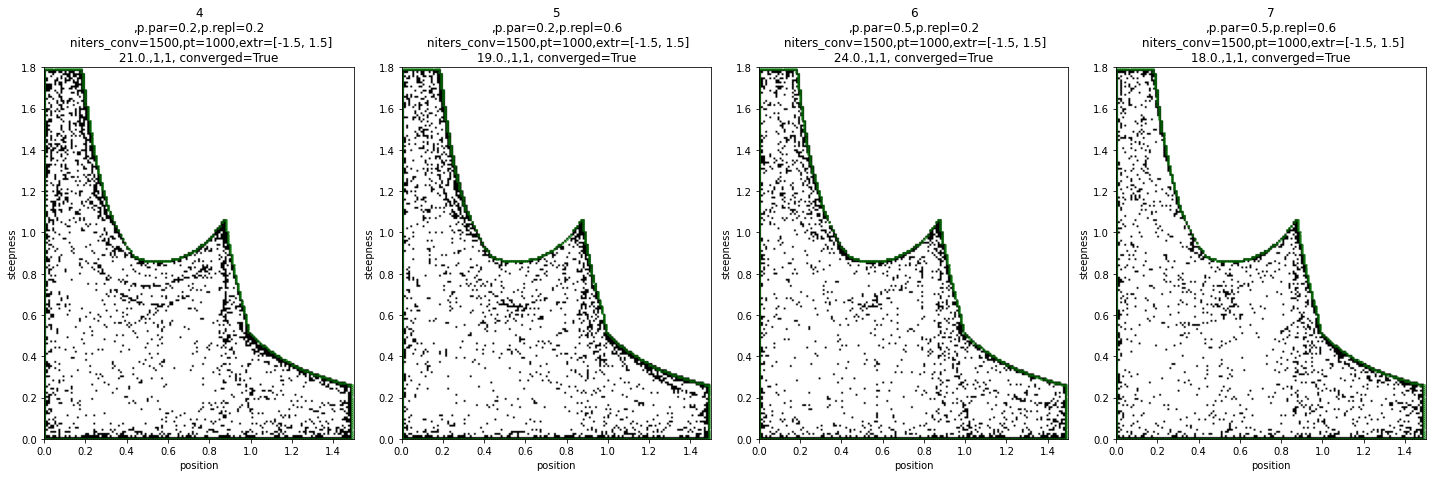

writing file to check in mat_N4univ_8.in
jid is 9
../clustersearch/2022_04_05_N4univ_allregion/final_results/mat_N4univ_9_last.npy
writing file to check in mat_N4univ_9.in
jid is 10
../clustersearch/2022_04_05_N4univ_allregion/final_results/mat_N4univ_10_last.npy
writing file to check in mat_N4univ_10.in
jid is 11
../clustersearch/2022_04_05_N4univ_allregion/final_results/mat_N4univ_11_last.npy
writing file to check in mat_N4univ_11.in
jid is 12
../clustersearch/2022_04_05_N4univ_allregion/final_results/mat_N4univ_12_last.npy


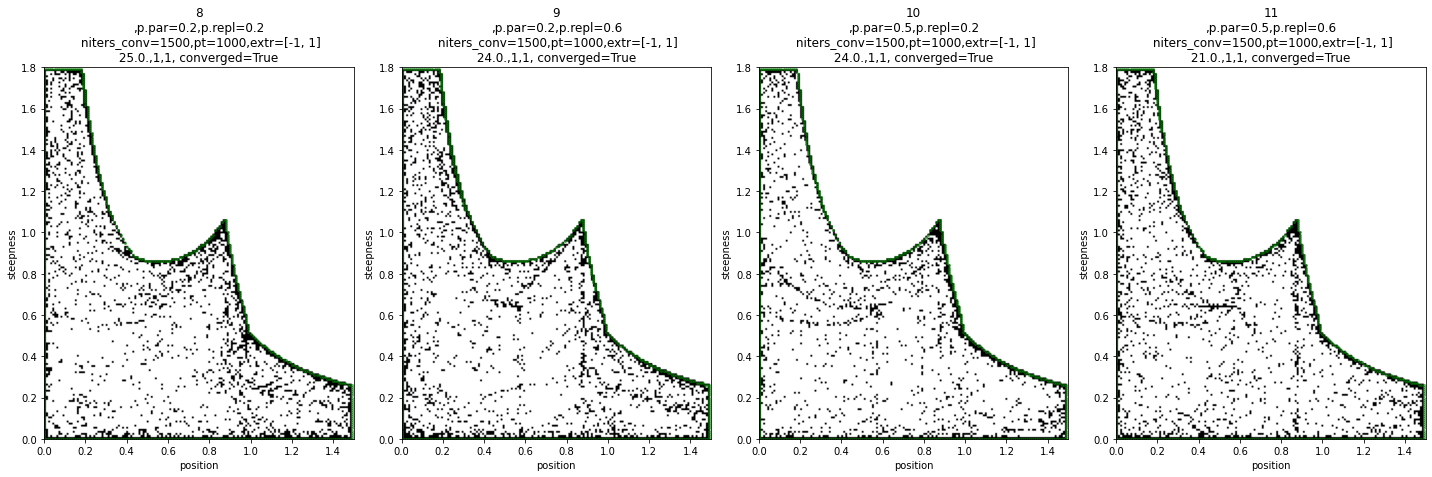

writing file to check in mat_N4univ_12.in
jid is 13
../clustersearch/2022_04_05_N4univ_allregion/final_results/mat_N4univ_13_last.npy
writing file to check in mat_N4univ_13.in
jid is 14
../clustersearch/2022_04_05_N4univ_allregion/final_results/mat_N4univ_14_last.npy
writing file to check in mat_N4univ_14.in
jid is 15
../clustersearch/2022_04_05_N4univ_allregion/final_results/mat_N4univ_15_last.npy
writing file to check in mat_N4univ_15.in


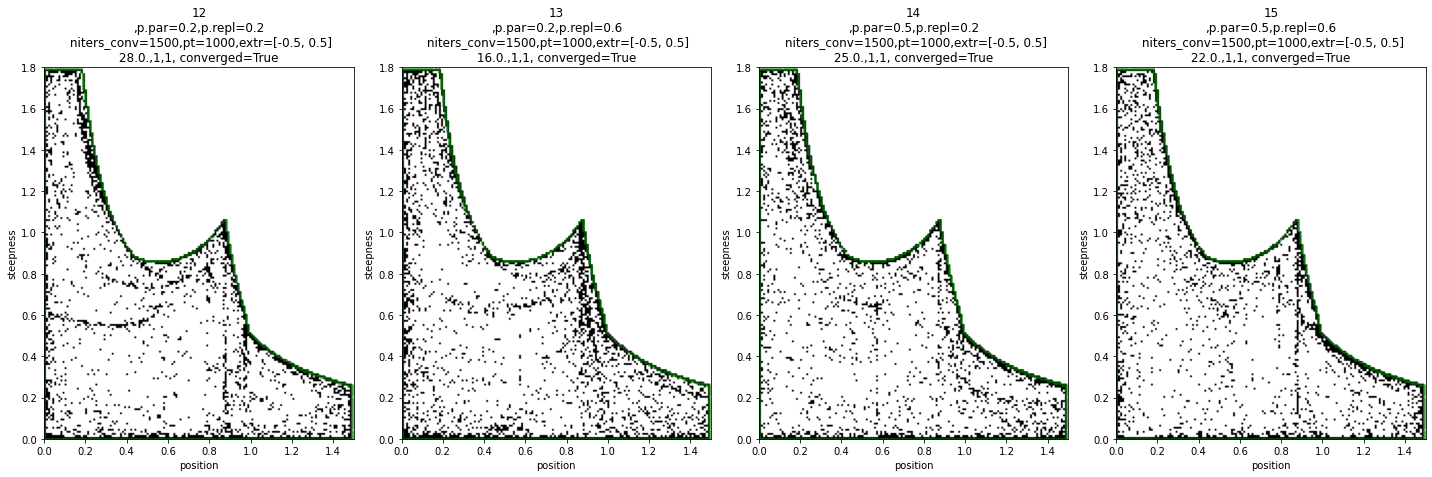

folder to check with mathematica is ../clustersearch/2022_04_05_N4univ_allregion/tocheck_N4univ
(181, 151)


/Users/rosamartinezcorral/Dropbox (HMS)/work2/shared/utilsGRF/AnalyseBoundarysearch.py:410: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  allpdf=pd.DataFrame(np.array(allpointslist),columns=allpointscolnames)


In [4]:
processrawdata=True

#if processrawdata:
allbs=dict()
allchecks=dict()



args={'njobs':16, #in case any of the searches failed, otherwise indicate number of jobs 
      'final':True, #jobs converged (False if the jobs were killed due to e.g. time constraints)
      'printtocheck':True,#print results to check with an alternative method or software e.g. mathematica
      'fldr':folder1,
      'basename':basename,
    'joinmats':True,
      'jid_num':jid, 
      'reference':None, 
      'xlabel':'position', 'ylabel':'steepness',
      'getallpoints':True,
     'septime':" ",
     'difparslimit':True,#True if the search was launched for different parameter ranges
     'unfinishedfolder':None} #indicate folder where intermediate results are saved, if final=False
results=AnalyseBoundarysearch.plot_boundaries_search(**args)
   
    

In [5]:
checkf=results[1] 
checkf

'../clustersearch/2022_04_05_N4univ_allregion/tocheck_N4univ'

40148


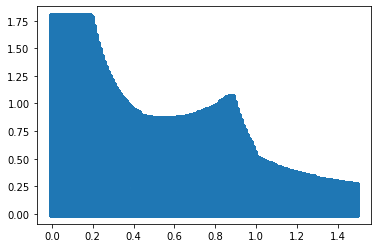

In [6]:
df=results[2]
print(len(df))
plt.scatter(df["col"],df["row"])
plt.show()


40148


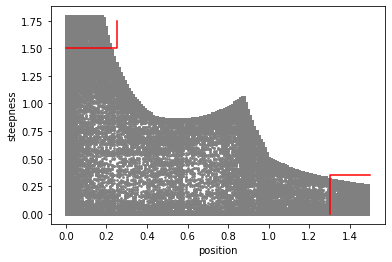

In [7]:
df=results[2]
print(len(df))
plt.scatter(df["col"],df["row"],s=3,color="gray")
plt.xlabel("position")
plt.ylabel("steepness")
plt.plot([0,0.25,0.25],[1.5,1.5,1.75],color="r")
plt.plot([1.3,1.3,1.5],[0,0.35,0.35],color="r")
#plt.axvline(x=3)
plt.show()


In [8]:
sys.path.append("../bin")
import N4univ
instance=N4univ.GRFCalculations_100_100_15()

In [9]:
#check with higher precision- this takes a couple of hours to do
goodpoints=[]
for i in range(len(df)):
    if i%500==0:
        print(i,end=",")
    row=df.iloc[i]
    parset=np.asarray(row["parameters"])
    #print(parset)
    instance.fill_num_den(parset,np.array([0]))
    result=instance.interfaceps(minx0=False,maxx1=False,absder=True)
    if result[0]>0:
        newpos=result[0]
        newstp=result[1]
        goodpoints.append([newpos,newstp,parset])
    

0,500,1000,1500,2000,2500,3000,3500,4000,4500,5000,5500,6000,6500,7000,7500,8000,8500,9000,9500,10000,10500,11000,11500,12000,12500,13000,13500,14000,14500,15000,15500,16000,16500,17000,17500,18000,18500,19000,19500,20000,20500,21000,21500,22000,22500,23000,23500,24000,24500,25000,25500,26000,26500,27000,27500,28000,28500,29000,29500,30000,30500,31000,31500,32000,32500,33000,33500,34000,34500,35000,35500,36000,36500,37000,37500,38000,38500,39000,39500,40000,

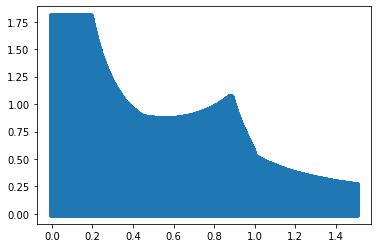

In [11]:

allx=[]
ally=[]

for i in range(len(goodpoints)):
    allx.append(goodpoints[i][0])
    ally.append(goodpoints[i][1])
plt.scatter(allx,ally)
plt.show()

In [12]:
#this may not work if the derivative is too close to 0?
checkf=results[1] 
#tolerance manually modified to 0.015, since now the arrays are separated 0.01
print(checkf)
command="wolframscript -file ../bin/N4univ_manualfix_bigdif2.wl '%s' '%s'"%(checkf,absder)  
! $command

../clustersearch/2022_04_05_N4univ_allregion/tocheck_N4univ
First line
absder True
starting at
../clustersearch/2022_04_05_N4univ_allregion/tocheck_N4univ
mat_N4univ_0.in
mat_N4univ_0_checked.out
Defined GRF

Solve::ratnz: Solve was unable to solve the system with inexact coefficients. The answer was obtained by solving a corresponding exact system and numericizing the result.
1,
Solve::ratnz: Solve was unable to solve the system with inexact coefficients. The answer was obtained by solving a corresponding exact system and numericizing the result.

Solve::ratnz: Solve was unable to solve the system with inexact coefficients. The answer was obtained by solving a corresponding exact system and numericizing the result.

General::stop: Further output of Solve::ratnz will be suppressed during this calculation.
2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,33,34,35,36,37,38,39,
Solve::fulldim: The solution set contains a full-dimensional component; use Red

1.11022 10;0.95,0.;97,98,99maxat0,100,101maxat0,103,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300,301,302,303,304,305,306,307,308,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325,326,327,328,329,330,331,332,333,334,335,336,337,338,339,340,341,

3.55271 10;0.,0.;2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39maxat0,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59maxat0,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,2

limits of parameters:,0.001 1000.0;0.001 1000.0;0.001 1000.0;0.001 1000.0;0.001 1000.0;0.001 1000.0;0.001 1000.0;0.001 1000.0;0.001 1000.0;0.001 1000.0;0.001 1000.0;0.001 1000.0;0.001 1000.0;0.001 1000.0;0.001 1000.0;0.001 1000.0;

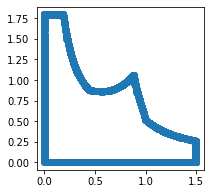

In [13]:
checkedfiles1=[x for x in os.listdir(checkf) if ".out" in x and "checked" in x]#all parameter sets tested with max derivative not at 0 and coincident result with mathematica

parlims_nums=[[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]]  
              
              
              
checked_pos_stp=[[] for x in range(len(parlims_nums))]
for plim in range(1):
    allpos=[]
    allrhos=[]
    print("limits of parameters:", end=",")
    for f in checkedfiles1:
        #print(f)
        num=int(f.split("_")[2])
        #print(f,num)
        if num in parlims_nums[plim]:
            data=pd.read_csv(os.path.join(checkf,f),sep=",|;",engine="python") #sep and engine are used to indicate that there are 2 separators
            pos=data["pos"].values
            stp=data["rho"].values
            print(data.values[:,2:].min(),data.values[:,2:].max(),end=";")
            allpos.extend(pos)
            allrhos.extend(stp)
    fig,ax=plt.subplots(1,1,figsize=(3,3))
    ax.scatter(allpos,allrhos)
    plt.show()
    checked_pos_stp[plim]=[allpos,allrhos]
    
    

In [14]:
folder1

'../clustersearch/2022_04_05_N4univ_allregion'

2022_8_23
[3.0]


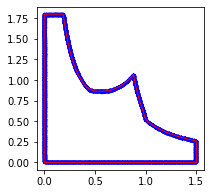

./ashapes/ashape_N4univ_biggergrid_3_2022_8_23.npy


In [15]:

localt=time.localtime()
string="%d_%d_%d"%(localt[0],localt[1],localt[2])
print(string)


plims=[np.log10(x[1]) for x in extremespars]
print(plims)
for i in range(len(plims)):
    data=checked_pos_stp[i]
    allpoints=results[2]
    
    

    l_p=[(data[0][j],data[1][j]) for j in range(len(data[0]))] 
    
    alpha=10
    plt.figure(figsize=(3,3))
    plt.scatter(data[0],data[1],color="b",s=5)

    a=alphashape.alphashape(l_p,alpha=alpha)   #tweak alpha until it adapts well to the points
    plt.plot(a.exterior.xy[0],a.exterior.xy[1],color="r",linewidth=1)
    plt.show()
    ashapename=os.path.join(ashapesfolder,"%s_%g_%s.npy"%(name_ashape,plims[i],string)) #previous date was 2022_4_14
    print(ashapename)
    np.save(ashapename,(a.exterior.xy))


In [17]:
def plot_hillline(ax,nmax=1):
    nrange=np.arange(1.8,nmax+0.2,0.1)
    hillline=np.vstack([BF.position_steepness_hill(n) for n in nrange])
    #fig,ax=plt.subplots(1,1,figsize=(5,5))
    ax.plot(hillline[:,0],hillline[:,1],color='gray',linestyle='--',label='Hill line')
    for n in range(2,nmax):
        ph,sh=BF.position_steepness_hill(n)
        ax.scatter(ph,sh,color='gray')
        ax.text(ph*1.01,sh*0.98,'n=%d'%n,color='gray')
    ax.legend()
    #ax.set_xlim(0.499,1.2)
    ax.set_xlabel('position')
    ax.set_ylabel('steepness')
    return ax

3.0


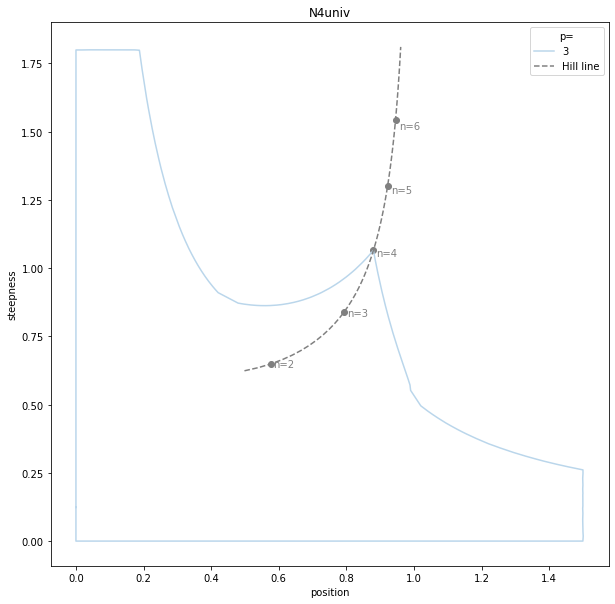

In [18]:
colors=plt.cm.Blues(np.linspace(0,1,8)[2:])
fig,ax=plt.subplots(1,1,figsize=(10,10))
ax.set_title("%s"%basename)
linestyles=["-","-","-",":",":"]
for i in range(len(plims)):
    print(plims[i])
    date=string
    ashape=np.load(os.path.join(ashapesfolder,"%s_%d_%s.npy"%(name_ashape,plims[i],date)))
    ax.plot(ashape[0],ashape[1],color=colors[i],label="%g"%plims[i],linestyle=linestyles[i])
    ax.set_xlabel("position")
    ax.set_ylabel("steepness")
ax=plot_hillline(ax,nmax=7)
ax.legend(title="p=")
plt.show()


In [19]:
step=0.01
stp_ar0=np.arange(0.,1.8+step,step)
pos_ar0=np.arange(0.,1.5+step,step)
len(pos_ar0)*len(stp_ar0)

27331

In [20]:
#now prepare new matrix to run the top-left and bottom-right
#top-left
pos_ar_topl=np.arange(0,0.21,0.01)
stp_ar_topl=np.arange(1.6,10,0.02)
len(pos_ar_topl)*len(stp_ar_topl)

8820

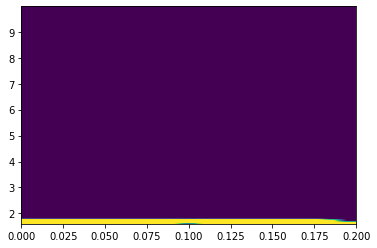

In [21]:
pos_ar=pos_ar_topl
stp_ar=stp_ar_topl
newmat=np.zeros((len(stp_ar),len(pos_ar)))
newmat_pars=np.zeros((len(stp_ar),len(pos_ar),10))
df=results[2]
subdf=df[df["row"]>stp_ar.min()]

for i in range(len(subdf)):
    row=subdf.iloc[i]
    pos=row["col"]
    stp=row["row"]
    if stp>=stp_ar[0] and stp<=stp_ar[-1] and pos>=pos_ar[0] and pos<=pos_ar[-1]:
        idx_r=np.where(stp>=stp_ar)[0][-1]
        idx_c=np.where(pos>=pos_ar)[0][-1]
        if newmat[idx_r,idx_c]<1:
            newmat[idx_r,idx_c]=1
            newmat_pars[idx_r,idx_c]=row["parameters"]
            #print("adding")
plt.imshow(newmat,origin="lower",extent=[pos_ar[0],pos_ar[-1],stp_ar[0],stp_ar[-1]],aspect="auto",interpolation=None)
plt.show()
#np.save("mat_topleft_N4univ_init.npy",newmat) #commented when running for paper repository, previously executed
#np.save("mat_pars_topleft_N4univ_init.npy",newmat_pars)

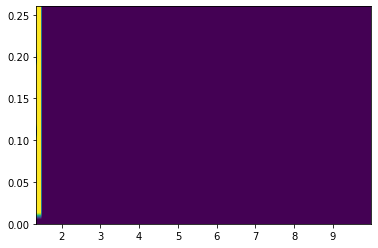

In [22]:
#bottom-right
pos_ar_br=np.arange(1.35,10,0.02)
stp_ar_br=np.arange(0,0.27,0.01)
pos_ar=pos_ar_br
stp_ar=stp_ar_br
newmat=np.zeros((len(stp_ar),len(pos_ar)))
newmat_pars=np.zeros((len(stp_ar),len(pos_ar),10))
df=results[2]
subdf=df[df["row"]>stp_ar.min()]

for i in range(len(subdf)):
    row=subdf.iloc[i]
    pos=row["col"]
    stp=row["row"]
    if stp>=stp_ar[0] and stp<=stp_ar[-1] and pos>=pos_ar[0] and pos<=pos_ar[-1]:
        idx_r=np.where(stp>=stp_ar)[0][-1]
        idx_c=np.where(pos>=pos_ar)[0][-1]
        if newmat[idx_r,idx_c]<1:
            newmat[idx_r,idx_c]=1
            newmat_pars[idx_r,idx_c]=row["parameters"]
            #print("adding")
plt.imshow(newmat,origin="lower",extent=[pos_ar[0],pos_ar[-1],stp_ar[0],stp_ar[-1]],aspect="auto",interpolation=None)
plt.show()
#np.save("mat_bright_N4univ_init.npy",newmat) #commented when running for paper repository, previously executed
#np.save("mat_pars_bright_N4univ_init.npy",newmat_pars)